TSF - TASK-1
---
Predict the percentage of a student based on the no. of study hours using Linear Regression.

Importing Project Dependencies
---

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/scores-tsf/Scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Exploratory Data Analysis
---

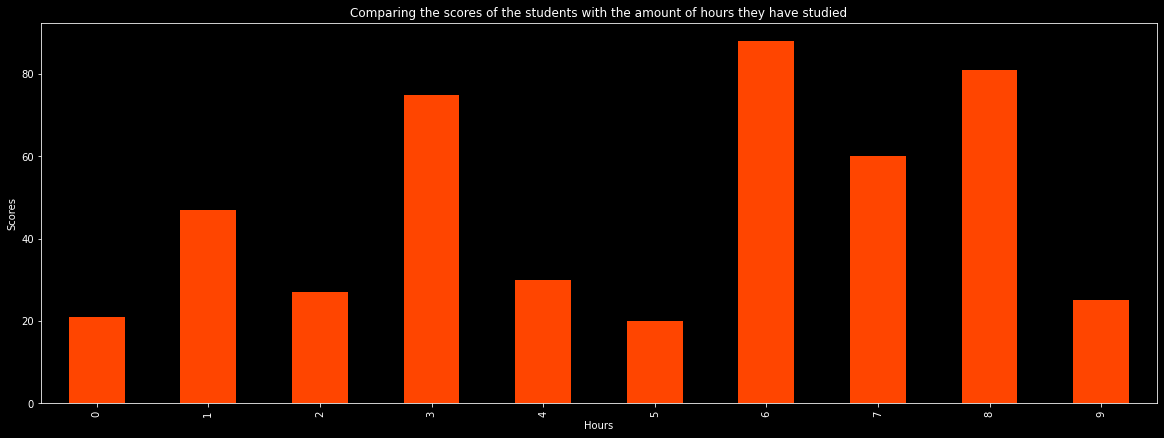

In [6]:
plt.style.use('dark_background') 
plt.figure(figsize = (20,7))
df['Scores'].head(10).plot.bar(color = 'orangered')
plt.title('Comparing the scores of the students with the amount of hours they have studied')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()  

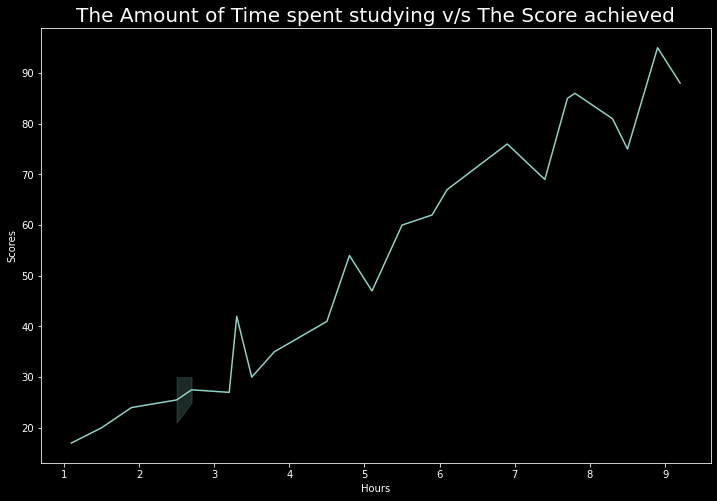

In [7]:
plt.figure(figsize=(12,8)) #comparing streaming time v/s followers gained
sns.lineplot(df['Hours'], df['Scores'], palette = "Set1")
plt.title('The Amount of Time spent studying v/s The Score achieved', fontsize = 20)
plt.show()

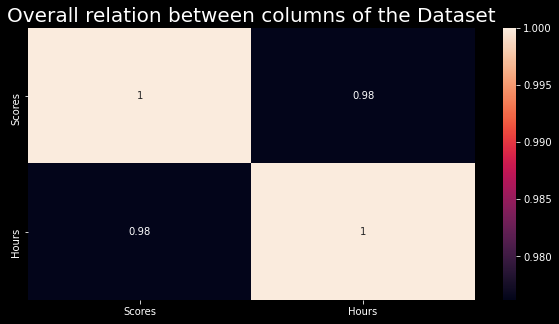

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Scores','Hours']].corr(), annot = True)
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

In [9]:
def studytime(x): # to get the scores of the student who studies for a particular time
    return df.loc[df['Hours']==x]

In [10]:
studytime(5.1)

,Hours,Scores
1,5.1,47


Modeling
---

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values   

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 101)

In [14]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [15]:
linear  = LinearRegression()
linear.fit(X_train,y_train)
pred = linear.predict(X_test)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, pred)))
print('MSE : '+str(mean_squared_error(y_test, pred)))

r2 score: 0.9508624143433742
MSE : 30.301511154919243


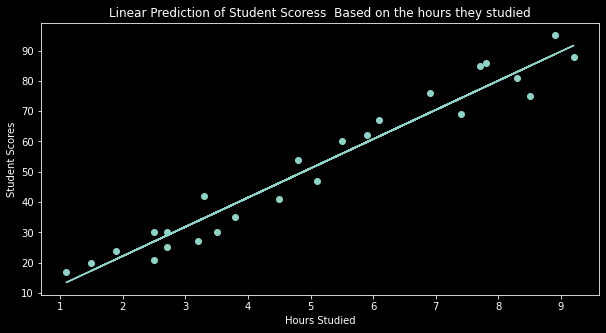

In [17]:
plt.figure(figsize=(10,5))
line = linear.coef_*X+linear.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Hours Studied')
plt.ylabel('Student Scores')
plt.title("Linear Prediction of Student Scoress  Based on the hours they studied")
plt.show()

In [18]:
hours = 9.25
scores = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(scores[0]))

No of Hours = 9.25
Predicted Score = 92.13236597362464


Result
---
From the data that we were given, we could see as the number of hours a student studied everyday increased, there was a increase in their scores. In some cases, we could see some students had high score with less study hours and a few had low scores even after studying for 9+ hours. This might be because some students could focus more and understand more so with less study time, they were still able to achieve good scores. In the other case, long study hours would have burnt the students out which might have led to low scores. This concludes my Analysis of Student scores based on their Study hours.